Préparer les fichiers txt, et faire des analyses préliminaires 

In [2]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np


In [3]:
path = "../../data/halley/halley_txt/" # Path to the directory containing text files
files = sorted(os.listdir(path)) # trier les fichiers par ordre alphabétique
len(files)  # probably get rid of this later

551

In [14]:
#parcourir les fichiers pour extraire leurs dates ?? décénnie ? 
#dates, le jour même est important pour qquns, au moins la semaine mais bon 


chaine = 'KB_JB838_1887-12-22_01-00001'
type(chaine) # to check that it's a string, so we can def delete this later 

# la méthode split afin d'avoir la date/décénnie des documents 
chaine_split = chaine.split('_')
# chaine_split ,also don't think this is necessary to have twice
date = chaine_split[2] #cchercher le 3e élément
date_split = date.split('-')
year = date_split[0]
month = date_split[1]
day = date_split[2]
#I'm not actually sure that I'll need this for any sort of analysis yet, so I'm just going to leave it here for now knowing that it works

count_decade = defaultdict(int)
count_month = defaultdict(int)
count_day = defaultdict(int)
count_year = defaultdict(int)
count_newspapers = defaultdict(int)
date_newspaper_count = defaultdict(lambda: defaultdict(int)) # Nested dictionary to count by day and newspaper
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        day = int(elems[2].split("-")[2]) # extracting day
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
        count_day[day] += 1
        count_year[year] += 1
        date_newspaper_count[(year, month, day)][newspaper] += 1 # Increment count for specific day and newspaper
        
    else:
        print(f"Anomalous file: {f}")

        
        

In [31]:
# SHARED VISUALIZATION for entire notebook - global newspaper color mapping


# Calculate total frequency for each newspaper across entire dataset
newspaper_total_frequency_global = defaultdict(int)
for date_data in date_newspaper_count.values():
    for newspaper, count in date_data.items():
        newspaper_total_frequency_global[newspaper] += count

# Sort newspapers by global frequency for consistent ordering
sorted_newspapers_global = sorted(newspaper_total_frequency_global.items(), key=lambda x: x[1], reverse=True)
newspapers_sorted = [newspaper for newspaper, _ in sorted_newspapers_global]




##NEED TO TO DOUBLE CHECK THESE RESULTS below
# Sort years for consistent ordering
sorted_years_global = sorted(count_year.items(), key=lambda x: x[1], reverse=True)
years_sorted = [year for year, _ in sorted_years_global]

# Sort decades for consistent ordering
sorted_decades_global = sorted(count_year.items(), key=lambda x: x[1], reverse=True)
decades_sorted = [year for year, _ in sorted_decades_global]

##NEED TO TO DOUBLE CHECK THESE RESULTS above




# Create global color mapping for newspapers
cmap = plt.cm.viridis
colors_global = cmap(np.linspace(0.3, 1.0, len(newspapers_sorted)))
newspaper_colors_global = {newspaper: colors_global[i] for i, newspaper in enumerate(newspapers_sorted)}


# Reusable function to create stacked bar charts by time period and newspaper
def create_stacked_bar_chart(time_period_data, time_labels, xlabel, title, rotation=30):
    """
    Creates a stacked bar chart showing newspaper distribution over time periods.
    
    Parameters:
    - time_period_data: dict of {time_period: {newspaper: count}}
    - time_labels: list of time period labels (in order)
    - xlabel: label for x-axis
    - title: chart title
    - rotation: rotation angle for x-tick labels
    """
    # Calculate totals for newspapers in this specific subset
    newspaper_totals_subset = defaultdict(int)
    for period_data in time_period_data.values():
        for newspaper, count in period_data.items():
            newspaper_totals_subset[newspaper] += count
    
    # Filter to only newspapers present in this subset, keeping global sort order
    newspapers_present = [n for n in newspapers_sorted if newspaper_totals_subset[n] > 0]
    
    # Prepare stacked bar data
    index = np.arange(len(time_labels))
    bottom = np.zeros(len(time_labels))
    
    # Create stacked bars
    for newspaper in newspapers_present:
        counts = [time_period_data[period][newspaper] for period in time_labels]
        plt.bar(index, counts, bottom=bottom, color=newspaper_colors_global[newspaper],
                label=f"{newspaper_names.get(newspaper, newspaper)} ({newspaper_totals_subset[newspaper]})")
        bottom += counts
    
    plt.xlabel(xlabel)
    plt.ylabel('Nombre de documents')
    plt.xticks(index, time_labels, fontsize=8, rotation=rotation)
    plt.title(title)
    plt.legend(fontsize=6, title="Journal (fréquence totale)")
    plt.tight_layout()
    plt.show()

In [ ]:
# Calculate total frequency for each newspaper across all days
#newspaper_total_frequency = defaultdict(int) 
#for day_data in day_newspaper_count.values():
 #   for newspaper, count in day_data.items():
  #      newspaper_total_frequency[newspaper] += count
#print(len(newspaper_total_frequency))  # to check how many unique newspapers we have, matches with count_newspapers


# Sort newspapers by total frequency and assign colors
#sorted_newspapers = sorted(newspaper_total_frequency.items(), key=lambda x: x[1], reverse=True)
#newspapers = [newspaper for newspaper, _ in sorted_newspapers] #list of newspapers sorted by frequency

# Use a colormap - more frequent = darker/more intense color
#cmap = plt.cm.viridis # or try: plt.cm.Blues, plt.cm.plasma , plt.cm.inferno
#colors = cmap(np.linspace(0.3, 1.0, len(newspapers)))
#newspaper_colors = {newspaper: colors[i] for i, newspaper in enumerate(newspapers)}

12
12


In [6]:
print(f"Il y a {count_newspapers['JB838']} exemplaires du journal Le Soir et {count_newspapers['JB427']} exemplaires de La Libre Belgique")
#faut modifier ceci pour tous les journaux qui traitent Halley 
#en vrai il ne faut pas faire tout ça hardcodé vue que c'est déjà dans le read me, mais pe interéssant pour une ananlyse éventuelle par journal etc 

Il y a 167 exemplaires du journal Le Soir et 24 exemplaires de La Libre Belgique


In [7]:
print(f"Il y a {count_decade['1830s']} fichiers pour la décennie 1930s")

Il y a 11 fichiers pour la décennie 1930s


Visualiser le nombre de documents par journal

In [6]:
#automatically get newspaper names from readme file
newspaper_names = {}
with open('../../data/halley/_README.txt', 'r', encoding='utf-8') as f:
    for line_num, line in enumerate(f, start=1):
        if 21 <= line_num <= 34:
            if line.strip():
                # Split by tab first, if that doesn't work, split by multiple spaces
                if '\t' in line:
                    parts = line.strip().split('\t')
                else:
                    parts = line.strip().split(None, 1)  # Split on whitespace, max 1 split
                
                if len(parts) == 2:
                    code, name = parts
                    newspaper_names[code] = name
len(newspaper_names)  # to check that we have all newspaper names
#struggled a bit bc of inconsistent spacing in the readme file but we're good now

14

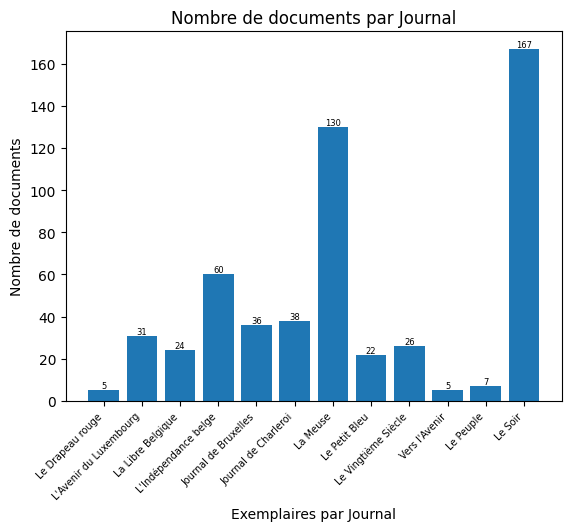

In [7]:
display_names = [newspaper_names.get(code, code) for code in count_newspapers.keys()]

index = np.arange(len(count_newspapers))
paper_bars = plt.bar(index, count_newspapers.values())
plt.xlabel('Exemplaires par Journal')
plt.ylabel('Nombre de documents')
plt.xticks(index, display_names, fontsize=7, rotation=45, ha='right')  # ha='right' aligns better with rotation
plt.title('Nombre de documents par Journal')
plt.bar_label(paper_bars, label_type='edge', fontsize=6)
#plt.tight_layout()   Prevents labels from being cut off

plt.show()

Visualiser le nombre de journaux par décennie

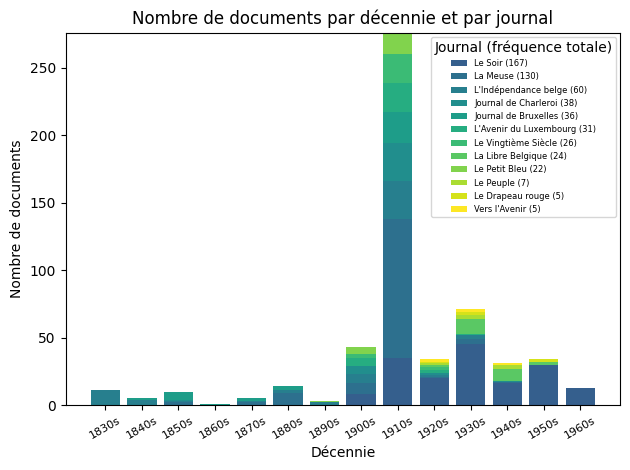

In [ ]:
# Create decade-newspaper mapping for entire dataset
decade_newspaper_count = defaultdict(lambda: defaultdict(int))

for (year, month, day), newspaper_data in date_newspaper_count.items():
    decade = f"{(int(year) // 10) * 10}s"  # Integer division to get decade
    
    for newspaper, count in newspaper_data.items():
        decade_newspaper_count[decade][newspaper] += count

# Sort decades chronologically
sorted_decades = sorted(decade_newspaper_count.keys(), 
                       key=lambda x: int(x.replace('s', '')))  # Remove 's' for sorting

create_stacked_bar_chart(decade_newspaper_count, sorted_decades,
                         'Décennie', 'Nombre de documents par décennie et par journal')

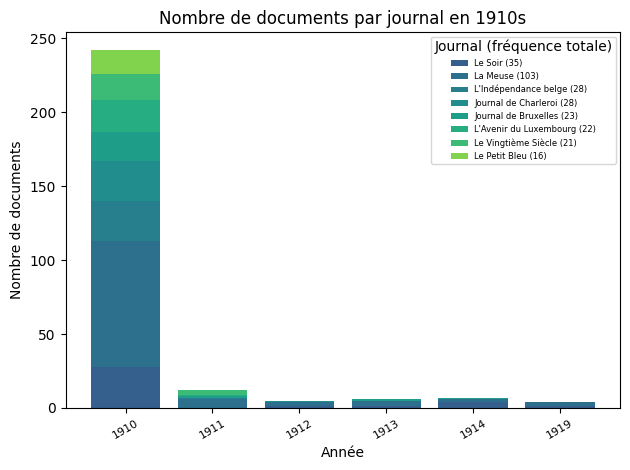

In [27]:
# Create year-newspaper mapping for 1910s
passage_1910s= [str(year) for year in range(1910, 1920)] #In Python, range(start, stop) generates numbers from start up to but not including stop
year_newspaper_count_1910s = defaultdict(lambda: defaultdict(int))

for (year, month, day), newspaper_data in date_newspaper_count.items():
    if year in passage_1910s:
        for newspaper, count in newspaper_data.items():
            year_newspaper_count_1910s[year][newspaper] += count

# Use the shared function
sorted_years = sorted(year_newspaper_count_1910s.keys(), key=int)
create_stacked_bar_chart(year_newspaper_count_1910s, sorted_years,
                         'Année', 'Nombre de documents par journal en 1910s')

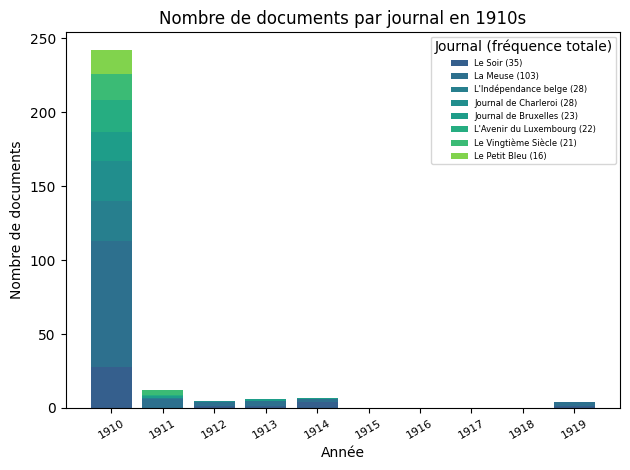

In [47]:
# Initialize ALL years in the 1910s with zero counts
passage_1910s = [str(year) for year in range(1910, 1920)]
year_newspaper_count_1910s = defaultdict(lambda: defaultdict(int))

# Pre-populate all years (even with zero documents)
for year in passage_1910s:
    year_newspaper_count_1910s[year] = defaultdict(int)  # Creates empty entry

# Then populate with actual data
for (year, month, day), newspaper_data in date_newspaper_count.items():
    if year in passage_1910s:
        for newspaper, count in newspaper_data.items():
            year_newspaper_count_1910s[year][newspaper] += count

sorted_years = sorted(year_newspaper_count_1910s.keys(), key=int)
create_stacked_bar_chart(year_newspaper_count_1910s, sorted_years,
                         'Année', 'Nombre de documents par journal en 1910s')

Visualiser le nombre de journaux par mois en 1910

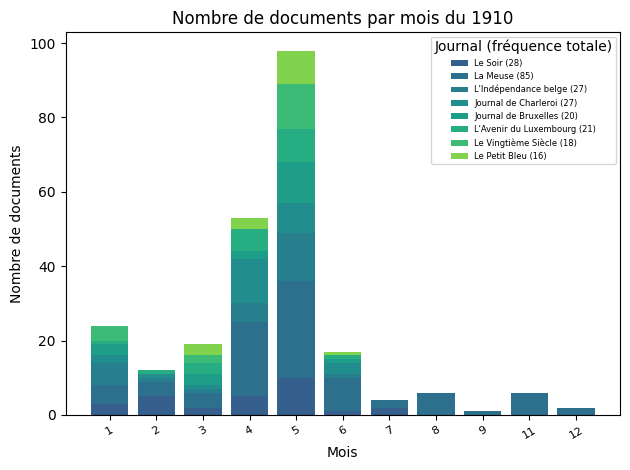

In [42]:
# Create month-newspaper mapping for 1909-1910
passage_1910 = [str(year) for year in range(1910, 1911)] #In Python, range(start, stop) generates numbers from start up to but not including stop
month_newspaper_count_1910 = defaultdict(lambda: defaultdict(int))

for (year, month, day), newspaper_data in date_newspaper_count.items():
    if year in passage_1910:
        for newspaper, count in newspaper_data.items():
            month_newspaper_count_1910[month][newspaper] += count

# Use the shared function
sorted_months = sorted(month_newspaper_count_1910.keys(), key=int)
create_stacked_bar_chart(month_newspaper_count_1910, sorted_months,
                         'Mois', 'Nombre de documents par mois du 1910')


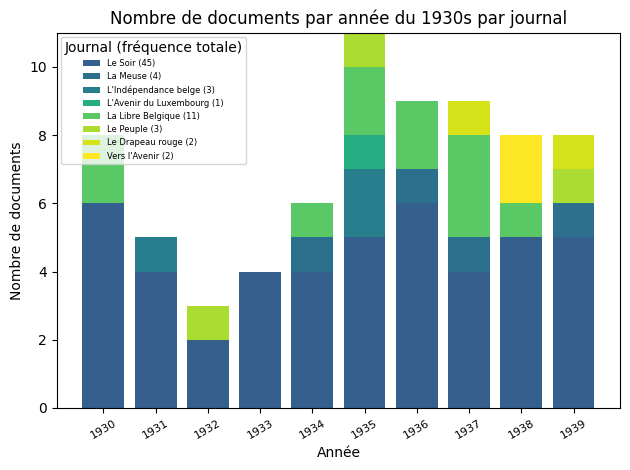

In [29]:
# Create year-newspaper mapping for 1930s
passage_1930s = [str(year) for year in range(1930, 1940)]
year_newspaper_count_1930s = defaultdict(lambda: defaultdict(int))

for (year, month, day), newspaper_data in date_newspaper_count.items():
    if year in passage_1930s:
        for newspaper, count in newspaper_data.items():
            year_newspaper_count_1930s[year][newspaper] += count

# Use the shared function
create_stacked_bar_chart(year_newspaper_count_1930s, passage_1930s,
                         'Année', 'Nombre de documents par année du 1930s par journal')

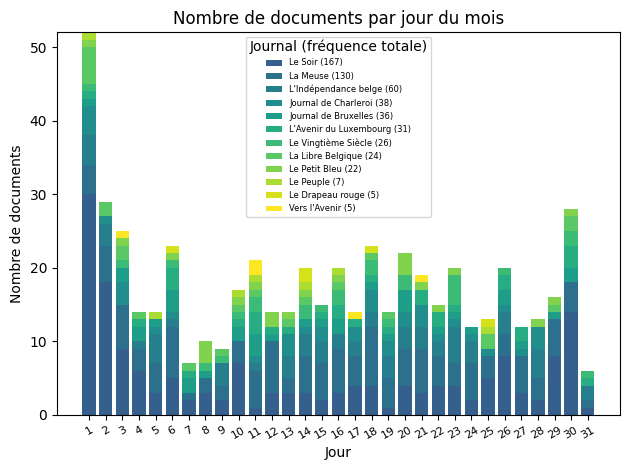

In [32]:
#idk general obeservation about publishing patterns over the month, could be compared to may 1910 to follow up
#maybe talk about how press was produced back then, idk what that really looked like. Might need to account for that different journals are monthly, weekly, daily etc 

# Aggregate by day across all years and months
day_newspaper_count_corpus = defaultdict(lambda: defaultdict(int))

for (year, month, day), newspaper_data in date_newspaper_count.items():
    for newspaper, count in newspaper_data.items():
        day_newspaper_count_corpus[day][newspaper] += count

# Use the shared function
days_corpus = sorted(day_newspaper_count_corpus.keys(), key=int)
create_stacked_bar_chart(day_newspaper_count_corpus, days_corpus,
                         'Jour', 'Nombre de documents par jour du mois')


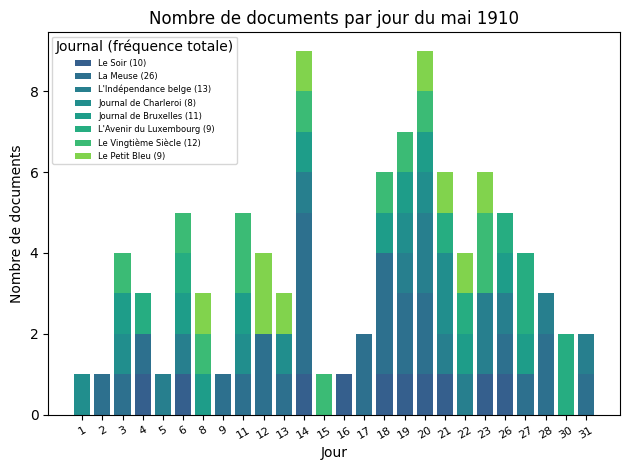

In [31]:
# Filter data for May 1910
specific_month = '05'
specific_year = '1910'

day_newspaper_count_may1910 = defaultdict(lambda: defaultdict(int))

for (year, month, day), newspaper_data in date_newspaper_count.items():
    if year == specific_year and f"{int(month):02d}" == specific_month:
        for newspaper, count in newspaper_data.items():
            day_newspaper_count_may1910[day][newspaper] += count

# Use the shared function
days_may1910 = sorted(day_newspaper_count_may1910.keys(), key=int)
create_stacked_bar_chart(day_newspaper_count_may1910, days_may1910,
                         'Jour', 'Nombre de documents par jour du mai 1910')

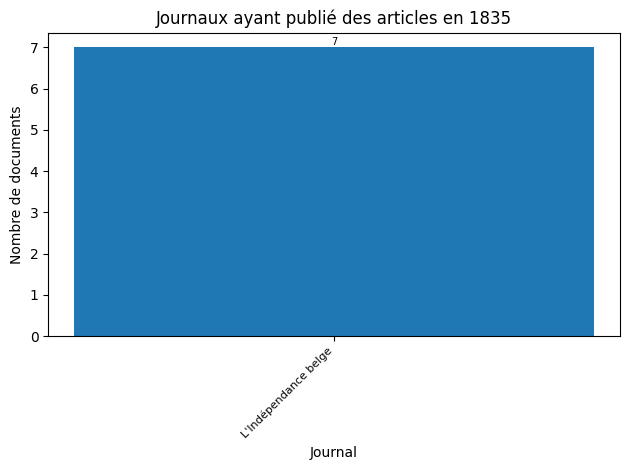


Nombre total de journaux en 1835: 1
  L'Indépendance belge (JB555): 7 documents


In [168]:
# Filter data for 1835
newspapers_1835 = defaultdict(int)

for (year, month, day), newspaper_data in date_newspaper_count.items():
    if year == '1835':
        for newspaper, count in newspaper_data.items():
            newspapers_1835[newspaper] += count

# Create visualization
if newspapers_1835:
    display_names_1835 = [newspaper_names.get(code, code) for code in newspapers_1835.keys()]
    
    index = np.arange(len(newspapers_1835))
    bars_1835 = plt.bar(index, newspapers_1835.values())
    plt.xlabel('Journal')
    plt.ylabel('Nombre de documents')
    plt.xticks(index, display_names_1835, fontsize=8, rotation=45, ha='right')
    plt.title('Journaux ayant publié des articles en 1835')
    plt.bar_label(bars_1835, label_type='edge', fontsize=7)
    plt.tight_layout()
    plt.show()
    
    print(f"\nNombre total de journaux en 1835: {len(newspapers_1835)}")
    for code, count in sorted(newspapers_1835.items(), key=lambda x: x[1], reverse=True):
        print(f"  {newspaper_names.get(code, code)} ({code}): {count} documents")
else:
    print("Aucun document trouvé pour l'année 1835")

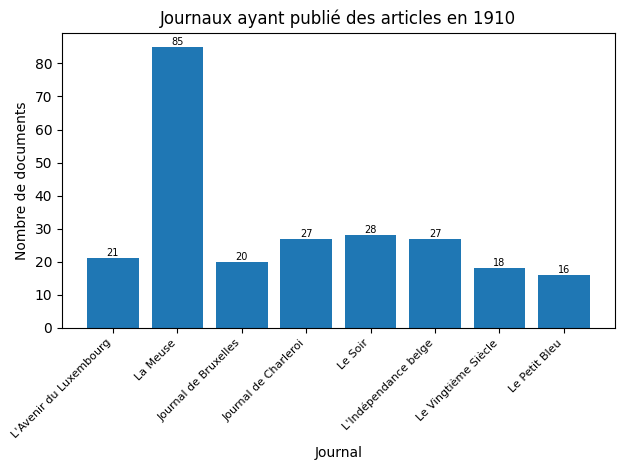


Nombre total de journaux en 1910: 8
  La Meuse (JB638): 85 documents
  Le Soir (JB838): 28 documents
  Journal de Charleroi (JB572): 27 documents
  L'Indépendance belge (JB555): 27 documents
  L'Avenir du Luxembourg (JB421): 21 documents
  Journal de Bruxelles (JB567): 20 documents
  Le Vingtième Siècle (JB729): 18 documents
  Le Petit Bleu (JB685): 16 documents


In [ ]:
# Filter data for 1910
newspapers_1910 = defaultdict(int)

for (year, month, day), newspaper_data in date_newspaper_count.items():
    if year == '1910':
        for newspaper, count in newspaper_data.items():
            newspapers_1910[newspaper] += count

# Create visualization
if newspapers_1910:
    display_names_1910 = [newspaper_names.get(code, code) for code in newspapers_1910.keys()]
    
    index = np.arange(len(newspapers_1910))
    bars_1910 = plt.bar(index, newspapers_1910.values())
    plt.xlabel('Journal')
    plt.ylabel('Nombre de documents')
    plt.xticks(index, display_names_1910, fontsize=8, rotation=45, ha='right')
    plt.title('Journaux ayant publié des articles en 1910')
    plt.bar_label(bars_1910, label_type='edge', fontsize=7)
    plt.tight_layout()
    plt.show()
    
    print(f"\nNombre total de journaux en 1910: {len(newspapers_1910)}")
    for code, count in sorted(newspapers_1910.items(), key=lambda x: x[1], reverse=True):
        print(f"  {newspaper_names.get(code, code)} ({code}): {count} documents")
else:
    print("Aucun document trouvé pour l'année 1910")

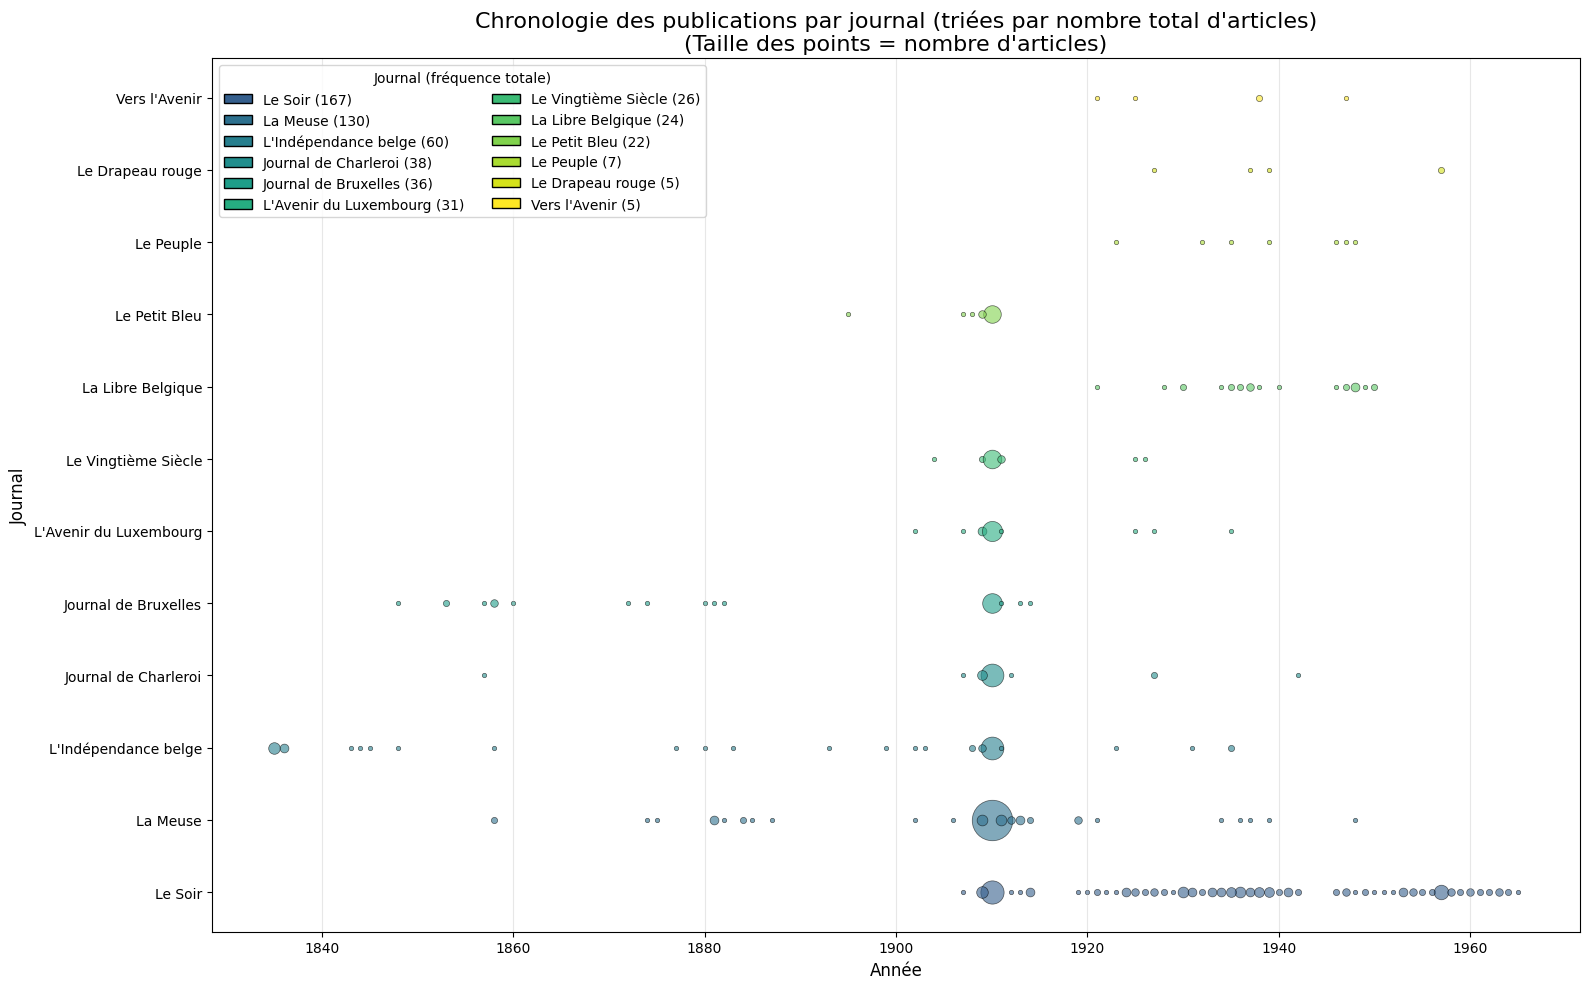


Statistiques par journal (triées par nombre total d'articles):
Le Soir (JB838):
  Période: 1907 - 1965
  Total articles: 167
  Années actives: 50
La Meuse (JB638):
  Période: 1858 - 1948
  Total articles: 130
  Années actives: 23
L'Indépendance belge (JB555):
  Période: 1835 - 1935
  Total articles: 60
  Années actives: 21
Journal de Charleroi (JB572):
  Période: 1857 - 1942
  Total articles: 38
  Années actives: 7
Journal de Bruxelles (JB567):
  Période: 1848 - 1914
  Total articles: 36
  Années actives: 14
L'Avenir du Luxembourg (JB421):
  Période: 1902 - 1935
  Total articles: 31
  Années actives: 8
Le Vingtième Siècle (JB729):
  Période: 1904 - 1926
  Total articles: 26
  Années actives: 6
La Libre Belgique (JB427):
  Période: 1921 - 1950
  Total articles: 24
  Années actives: 14
Le Petit Bleu (JB685):
  Période: 1895 - 1910
  Total articles: 22
  Années actives: 5
Le Peuple (JB837):
  Période: 1923 - 1948
  Total articles: 7
  Années actives: 7
Le Drapeau rouge (JB1051):
  Périod

In [37]:
#I really hate to admit it but this is pretty speaking, and it gives me a better overall picture that the data is being interpreted correctly 
# Count articles per newspaper per year (this part stays the same)
newspaper_year_count = defaultdict(lambda: defaultdict(int))

for (year, month, day), newspaper_data in date_newspaper_count.items():
    for newspaper, count in newspaper_data.items():
        newspaper_year_count[newspaper][year] += count

# Use the global sorted newspaper list instead of recalculating
fig, ax = plt.subplots(figsize=(16, 10))

y_positions = np.arange(len(newspapers_sorted))
display_names = [newspaper_names.get(code, code) for code in newspapers_sorted]

# Use the global color mapping
for i, newspaper in enumerate(newspapers_sorted):
    years_counts = newspaper_year_count[newspaper]
    
    for year, count in years_counts.items():
        year_int = int(year)
        size = count * 10  # Adjust multiplier as needed
        ax.scatter(year_int, i, s=size, color=newspaper_colors_global[newspaper], 
                   alpha=0.6, edgecolors='black', linewidth=0.5)

# Create custom legend with total frequencies
from matplotlib.patches import Patch
legend_elements = []
for i, newspaper in enumerate(newspapers_sorted):
    display_name = newspaper_names.get(newspaper, newspaper)
    total_pubs = newspaper_total_frequency_global[newspaper]
    legend_elements.append(Patch(facecolor=newspaper_colors_global[newspaper], 
                                  edgecolor='black', 
                                  label=f"{display_name} ({total_pubs})"))

ax.set_yticks(y_positions)
ax.set_yticklabels(display_names, fontsize=10)
ax.set_xlabel('Année', fontsize=12)
ax.set_ylabel('Journal', fontsize=12)
ax.set_title('Chronologie des publications par journal (triées par nombre total d\'articles)\n(Taille des points = nombre d\'articles)', fontsize=16)
ax.legend(handles=legend_elements, fontsize=10, title="Journal (fréquence totale)", 
          loc='best', ncol=2)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics (this part stays the same)
print("\nStatistiques par journal (triées par nombre total d'articles):")
for newspaper in newspapers_sorted:
    display_name = newspaper_names.get(newspaper, newspaper)
    years = sorted(newspaper_year_count[newspaper].keys())
    total_articles = newspaper_total_frequency_global[newspaper]
    first_year = years[0] if years else "N/A"
    last_year = years[-1] if years else "N/A"
    print(f"{display_name} ({newspaper}):")
    print(f"  Période: {first_year} - {last_year}")
    print(f"  Total articles: {total_articles}")
    print(f"  Années actives: {len(years)}")